In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
lemmas_2 = pd.read_csv('data/wefarm_lemmas.csv') 

### Clustering:

In [50]:
def cluster(docs, gs_clusters, n_iter, n_init):
    km = KMeans(n_clusters=gs_clusters, init='k-means++', max_iter=n_iter, n_init=n_init, random_state=21) 
    km.fit(docs) 
    return km

In [1]:
def cluster_desc(model, vec):
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vec.get_feature_names()
    for i in range(n_clusters):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind])

In [22]:
#using the first 20K samples for tSNE
train_small = lemmas_2[:20000] 
train_small.lemmas.fillna(value='', inplace=True, axis=0) 
train_small = train_small.lemmas.values.tolist()

In [71]:
vect = TfidfVectorizer()
X_train_small = vect.fit_transform(train_small)
X_train_small.shape

(20000, 15158)

In [76]:
km_small = cluster(X_train_small, 69, 1000, 10)

In [77]:
n_clusters = 69
cluster_desc(km_small, vect)

Top terms per cluster:
Cluster 0:
 cost
 house
 incubator
 goat
 chicken
 market
 poultry
 cow
 egg
 breed
Cluster 1:
 use
 chemical
 medicine
 kill
 drug
 chicken
 cow
 treat
 deworm
 plant
Cluster 2:
 pest
 control
 use
 disease
 chemical
 affect
 tomato
 bean
 method
 pesticide
Cluster 3:
 feed
 chicken
 cow
 layer
 type
 pig
 day
 milk
 use
 production
Cluster 4:
 plant
 watermelon
 seed
 onion
 tree
 procedure
 grass
 type
 variety
 care
Cluster 5:
 manure
 use
 compost
 organic
 plant
 farmyard
 apply
 planting
 fertilizer
 add
Cluster 6:
 dairy
 cow
 goat
 milk
 feed
 meal
 produce
 production
 day
 salt
Cluster 7:
 hatch
 egg
 chicken
 incubator
 day
 lay
 long
 problem
 lie
 kienyeji
Cluster 8:
 start
 chicken
 requirement
 bee
 capital
 poultry
 project
 rear
 dairy
 business
Cluster 9:
 topdress
 fertilizer
 maize
 use
 stage
 suitable
 potato
 time
 necessary
 knee
Cluster 10:
 long
 heat
 cow
 mature
 sign
 calf
 deworm
 harvest
 birth
 onion
Cluster 11:
 bed
 nursery
 see

### Cluster visualisation with tSNE

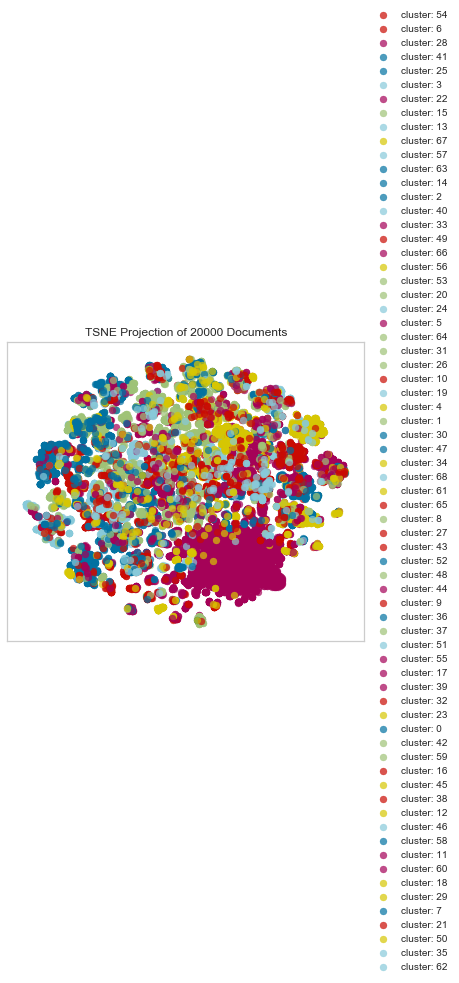

In [79]:
import yellowbrick
from yellowbrick.text import TSNEVisualizer

c = yellowbrick.style.colors.resolve_colors(n_colors=n_clusters, colormap='tab20b')

tsne = TSNEVisualizer(colors=c, random_state=21)
tsne.fit(X_train_small, ["cluster: {}".format(c) for c in km_small.labels_])

tsne.poof()

### LDA topics and tSNE visualisation

In [ ]:
stops = ['stop', 'challenge', 'requirement', 'apply', 'aply', 'control', 'explain', 'briefly', 'contact', 'use',
         'able', 'come', 'appropriate', 'best', 'cause', 'consider', 'correct', 'current', 'day', 'important', 
         'importance', 'month', 'okey', 'old', 'start', 'week', 'year']

In [23]:
import lda
from sklearn.feature_extraction.text import CountVectorizer

n_topics = 50 
n_iter = 500 

vectorizer = CountVectorizer(max_features=250, stop_words=stops)
vec = vectorizer.fit_transform(train_small)

lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(vec)

INFO:lda:n_documents: 20000
INFO:lda:vocab_size: 250
INFO:lda:n_words: 48347
INFO:lda:n_topics: 50
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -482164
INFO:lda:<10> log likelihood: -331419
INFO:lda:<20> log likelihood: -298050
INFO:lda:<30> log likelihood: -287972
INFO:lda:<40> log likelihood: -284668
INFO:lda:<50> log likelihood: -282330
INFO:lda:<60> log likelihood: -281405
INFO:lda:<70> log likelihood: -279493
INFO:lda:<80> log likelihood: -279459
INFO:lda:<90> log likelihood: -278942
INFO:lda:<100> log likelihood: -277943
INFO:lda:<110> log likelihood: -277848
INFO:lda:<120> log likelihood: -278077
INFO:lda:<130> log likelihood: -277901
INFO:lda:<140> log likelihood: -277285
INFO:lda:<150> log likelihood: -277423
INFO:lda:<160> log likelihood: -277442
INFO:lda:<170> log likelihood: -276737
INFO:lda:<180> log likelihood: -276443
INFO:lda:<190> log likelihood: -276216
INFO:lda:<200> log likelihood: -276621
INFO:lda:<210> log likelihood: -276536
INFO:lda:<220> log likelihood: -2

In [24]:
from sklearn.manifold import TSNE

# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.69, init='pca')

tsne_lda = tsne_model.fit_transform(X_topics) #30-D -> 2-D

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.185s...
[t-SNE] Computed neighbors for 20000 samples in 41.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

In [25]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool
import matplotlib

n_top_words = 5 #number of keywords we show

colors = []
for i in range(n_topics):
    for name, hex in matplotlib.colors.cnames.items():
        colors.append(hex)
        
colormap = np.array(colors)

In [26]:
_lda_keys = []
for i in range(X_topics.shape[0]):
  _lda_keys +=  X_topics[i].argmax(),

topic_summaries = []
topic_word = lda_model.topic_word_  # all topic words
vocab = vectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
  topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
  topic_summaries.append(' '.join(topic_words)) 

In [27]:
warnings.filterwarnings(action='ignore')

title = 'tsne_LDA_50topics_First 20000 queries'
num_example = len(X_topics)

plot_lda = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1],
                 color=colormap[_lda_keys][:num_example],
                 source=bp.ColumnDataSource({
                   "content": train_small[:num_example],
                   "topic_key": _lda_keys[:num_example]}))

GlyphRenderer(id='7ef24d7f-ce24-46ac-9f78-404d6cead40b', ...)

In [28]:
# randomly choose a query (within a topic) coordinate as the crucial words coordinate
topic_coord = np.empty((X_topics.shape[1], 2)) * np.nan
for topic_num in _lda_keys:
  if not np.isnan(topic_coord).any():
    break
  topic_coord[topic_num] = tsne_lda[_lda_keys.index(topic_num)]

# plot crucial words
for i in range(X_topics.shape[1]):
  plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]])

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - topic: @topic_key"}

# save the plot
save(plot_lda, '{}.html'.format(title))

'/Users/Nargess/coding/cambridge spark/proj/tsne_LDA_50topics_First 20000 queries.html'